## Demo: Forcasting Stock Performance in Our Portfolio

This program retrieves stock price data using the Alpaca API and then simulates future performance using Monte Carlo Simulation.

### Import Dependencies

In [2]:
# Import libraries and dependencies
import os
import pandas as pd
import pathlib as Path
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

In [3]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
# Set Alpaca API key and secret
alpaca_api_key = "{key}"
alpaca_secret_key = "{secret key}"

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

### Get Past 5 Year's Worth of Microsoft and Coca-Cola Stock Price Data via Alpaca API Call

In [5]:
# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2017-10-31", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-10-30", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ["TSLA", "NVDA", "AAPL", "AMZN", "META"]

# Get 3 year's worth of historical price data for Microsoft and Coca-Cola
df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

df_ticker.index = df_ticker.index.tz_localize(None)


# Display sample data
df_ticker

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2017-10-31 04:00:00,167.900,169.6499,166.9400,169.040,36070445,199384,168.609022,AAPL
2017-11-01 04:00:00,169.870,169.9400,165.6100,166.890,33638072,209941,167.188415,AAPL
2017-11-02 04:00:00,167.640,168.5000,165.2800,168.110,41394328,249912,168.444532,AAPL
2017-11-03 04:00:00,174.000,174.2600,171.1200,172.500,59402471,336014,172.719018,AAPL
2017-11-06 05:00:00,172.365,174.9900,171.7200,174.250,35026850,194183,173.981439,AAPL
...,...,...,...,...,...,...,...,...
2022-10-24 04:00:00,205.820,213.5000,198.5863,211.250,100819020,1305129,205.638853,TSLA
2022-10-25 04:00:00,210.100,224.3498,210.0000,222.415,96507697,1050829,219.992889,TSLA
2022-10-26 04:00:00,219.400,230.6000,218.2000,224.640,85275380,921830,226.572058,TSLA


In [6]:
# Reorganize the DataFrame
# Separate ticker data
TSLA = df_ticker[df_ticker['symbol']=='TSLA'].drop('symbol', axis=1)
NVDA = df_ticker[df_ticker['symbol']=='NVDA'].drop('symbol', axis=1)
AAPL = df_ticker[df_ticker['symbol']=='AAPL'].drop('symbol', axis=1)
AMZN = df_ticker[df_ticker['symbol']=='AMZN'].drop('symbol', axis=1)
META = df_ticker[df_ticker['symbol']=='META'].drop('symbol', axis=1)

In [7]:
## Obtain bond data
# Read in the transaction_fraud_data.csv file into a PandasDataFrame.
BOND30 = pd.read_csv("../Resources/treasury_yield_30yr.csv")#, index_col='Date', infer_datetime_format=True, parse_dates=True)

BOND30 = BOND30.set_index('Date')

#BOND30 = BOND30.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])

# Review the DataFrame
BOND30

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-10-31,2.878,2.886,2.870,2.875,2.875,0.0
2017-11-01,2.897,2.899,2.837,2.862,2.862,0.0
2017-11-02,2.848,2.856,2.822,2.829,2.829,0.0
2017-11-03,2.828,2.838,2.809,2.822,2.822,0.0
2017-11-05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2022-10-25,4.320,4.334,4.225,4.263,4.263,0.0
2022-10-26,4.198,4.215,4.143,4.163,4.163,0.0
2022-10-27,4.179,4.190,4.060,4.092,4.092,0.0


In [18]:
# Concatenate the ticker DataFrames
df_ticker = pd.concat([TSLA, NVDA, AAPL, AMZN, META], axis=1, keys=["TSLA", "NVDA", "AAPL", "AMZN", "META"])

# Display sample data
df_ticker

TSLA                                          \
                       open      high       low    close     volume   
timestamp                                                             
2017-10-31 04:00:00  320.23  331.9500  320.1800  331.530    5673424   
2017-11-01 04:00:00  332.25  332.6089  320.2600  321.080    8457356   
2017-11-02 04:00:00  300.13  308.6900  292.6300  299.260   19825936   
2017-11-03 04:00:00  299.50  306.2500  295.1300  306.090    8893974   
2017-11-06 05:00:00  307.00  307.5000  299.0100  302.780    6483309   
...                     ...       ...       ...      ...        ...   
2022-10-24 04:00:00  205.82  213.5000  198.5863  211.250  100819020   
2022-10-25 04:00:00  210.10  224.3498  210.0000  222.415   96507697   
2022-10-26 04:00:00  219.40  230.6000  218.2000  224.640   85275380   
2022-10-27 04:00:00  229.77  233.8100  222.8500  225.090   61644674   
2022-10-28 04:00:00  225.40  228.8600  216.3500  228.520   69040080   

                                                NVDA                   ...  \
                    trade_count        vwap     open    high      low  ...   
timestamp                                                              ...   
2017-10-31 04:00:00       61334  326.756937  205.130  207.89  204.900  ...   
2017-11-01 04:00:00      103427  321.100999  209.350  209.97  204.600  ...   
2017-11-02 04:00:00      221570  299.771739  206.000  207.81  203.650  ...   
2017-11-03 04:00:00       96532  300.254976  207.200  208.69  205.341  ...   
2017-11-06 05:00:00       71098  301.644604  207.200  209.98  206.700  ...   
...                         ...         ...      ...     ...      ...  ...   
2022-10-24 04:00:00     1305129  205.638853  125.080  127.10  120.640  ...   
2022-10-25 04:00:00     1050829  219.992889  126.935  133.00  126.640  ...   
2022-10-26 04:00:00      921830  226.572058  128.690  133.88  127.080  ...   
2022-10-27 04:00:00      740945  226.138713  136.300  138.38  131.220  ...   
2022-10-28 04:00:00      793069  224.185539  131.040  138.50  130.610  ...   

                          AMZN                              META          \
                        volume trade_count         vwap     open    high   
timestamp                                                                  
2017-10-31 04:00:00    3476968       55945  1105.775876  180.570  180.80   
2017-11-01 04:00:00    3755927       62863  1102.417730  182.360  182.90   
2017-11-02 04:00:00    3684876       61153  1094.569939  180.630  181.94   
2017-11-03 04:00:00    3752548       55799  1101.448691  179.290  179.86   
2017-11-06 05:00:00    3381147       57479  1120.412429  178.560  180.45   
...                        ...         ...          ...      ...     ...   
2022-10-24 04:00:00   49522735      492273   119.100718  127.250  133.48   
2022-10-25 04:00:00   50954509      469717   120.172043  130.875  138.35   
2022-10-26 04:00:00   68942548      644558   116.357401  131.680  135.55   
2022-10-27 04:00:00  129653465     1337218   105.597291   97.975  102.50   
2022-10-28 04:00:00  222666614     1862227   100.762260   99.580  100.85   

                                                                        
                        low   close     volume trade_count        vwap  
timestamp                                                               
2017-10-31 04:00:00  178.94  180.06   20174231      139067  179.879978  
2017-11-01 04:00:00  180.57  182.66   40920320      261019  182.207518  
2017-11-02 04:00:00  177.34  178.92   35626323      226731  179.227273  
2017-11-03 04:00:00  176.71  178.92   17832597      114335  178.427136  
2017-11-06 05:00:00  178.31  180.17   13397211       85235  179.170643  
...                     ...     ...        ...         ...         ...  
2022-10-24 04:00:00  124.57  129.72   63537444      550633  129.454491  
2022-10-25 04:00:00  130.59  137.51   38433219      325937  135.502788  
2022-10-26 04:00:00  128.53  129.82   89270778      867627  123.304

### The MCForecastTools Library at a Glance

In [19]:
# Print the documentation of the MCSimulation module of the MCForecastTools library
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

### Simulate five year portfolio growth using Monte Carlo simulation

In [20]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.20,.20,.20,.20,.20],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [21]:
# Printing the simulation input data
MC_fiveyear.portfolio_data.head()

TSLA                                                  \
                       open      high     low   close    volume trade_count   
timestamp                                                                     
2017-10-31 04:00:00  320.23  331.9500  320.18  331.53   5673424       61334   
2017-11-01 04:00:00  332.25  332.6089  320.26  321.08   8457356      103427   
2017-11-02 04:00:00  300.13  308.6900  292.63  299.26  19825936      221570   
2017-11-03 04:00:00  299.50  306.2500  295.13  306.09   8893974       96532   
2017-11-06 05:00:00  307.00  307.5000  299.01  302.78   6483309       71098   

                                                NVDA          ...  \
                           vwap daily_return    open    high  ...   
timestamp                                                     ...   
2017-10-31 04:00:00  326.756937          NaN  205.13  207.89  ...   
2017-11-01 04:00:00  321.100999    -0.031521  209.35  209.97  ...   
2017-11-02 04:00:00  299.771739    -0.067958  206.00  207.81  ...   
2017-11-03 04:00:00  300.254976     0.022823  207.20  208.69  ...   
2017-11-06 05:00:00  301.644604    -0.010814  207.20  209.98  ...   

                            AMZN                 META                          \
                            vwap daily_return    open    high     low   close   
timestamp                                                                       
2017-10-31 04:00:00  1105.775876          NaN  180.57  180.80  178.94  180.06   
2017-11-01 04:00:00  1102.417730    -0.001448  182.36  182.90  180.57  182.66   
2017-11-02 04:00:00  1094.569939    -0.008571  180.63  181.94  177.34  178.92   
2017-11-03 04:00:00  1101.448691     0.015883  179.29  179.86  176.71  178.92   
2017-11-06 05:00:00  1120.412429     0.008150  178.56  180.45  178.31  180.17   

                                                                    
                       volume trade_count        vwap daily_return  
timestamp                                                           
2017-10-31 04:00:00  20174231      139067  179.879978          NaN  
2017-11-01 04:00:00  40920320      261019  182.207518     0.014440  
2017-11-02 04:00:00  35626323      226731  179.227273    -0.020475  
2017-11-03 04:00:00  17832597      114335  178.427136     0.000000  
2017-11-06 05:00:00  13397211       85235  179.170643     0.006986  

[5 rows x 40 columns]

In [22]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/warrendenetsosie/Desktop/FinTech/Project_Two/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003555,0.988927,0.997447,1.035097,0.988067,1.017568,1.033823,1.004451,1.006171,1.000684,...,0.996846,1.022545,0.995071,0.984045,1.013613,0.982218,1.003831,1.007156,1.002651,0.993873
2,0.988987,1.021045,0.978797,1.032995,0.990707,1.028146,1.050325,1.031002,0.980009,1.009926,...,1.009893,1.035405,0.984730,0.941509,1.054050,1.003652,0.988526,0.983713,0.992040,0.961134
3,0.965724,1.030980,0.980380,1.057541,0.999154,1.044926,1.040468,1.017558,0.993595,1.016254,...,1.016864,1.046022,0.982472,0.942800,1.030582,1.008149,0.981943,1.000480,0.985395,0.949935
4,0.982803,1.013931,0.987192,1.067544,0.994929,1.038550,1.037796,1.022856,1.011287,1.011622,...,1.010221,1.035536,0.961050,0.938873,1.027267,1.017792,0.995824,0.978941,1.019181,0.981139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.114450,0.826446,3.272954,1.579009,1.305771,1.259565,1.282129,4.876897,1.163742,0.817782,...,1.576513,1.066354,1.677985,3.670049,2.294749,1.344362,1.659394,0.924070,1.002920,1.773202
1257,2.150689,0.814418,3.315584,1.578864,1.273639,1.274439,1.303687,4.968185,1.153551,0.819231,...,1.554031,1.075946,1.652513,3.701642,2.285422,1.360550,1.646713,0.956483,0.986415,1.767765
1258,2.182132,0.808097,3.301534,1.557600,1.322807,1.263348,1.285218,4.954804,1.135932,0.831022,...,1.552793,1.071605,1.607704,3.681425,2.393506,1.378180,1.633111,0.923430,1.010271,1.762486
1259,2.197659,0.817286,3.296118,1.558397,1.332793,1.250987,1.286677,5.012495,1.134460,0.816560,...,1.526518,1.090847,1.605078,3.797971,2.479287,1.383702,1.659065,0.939718,0.999334,1.758680


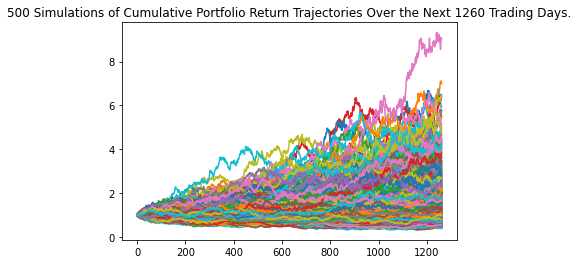

In [27]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_fiveyear_sim_plot_aggressive.png", bbox_inches="tight")

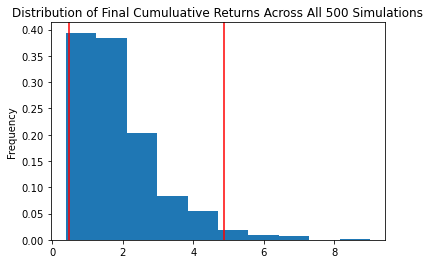

In [28]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot_aggressive.png',bbox_inches='tight')

In [25]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.908050
std               1.197968
min               0.382290
25%               1.063016
50%               1.616424
75%               2.398670
max               9.012085
95% CI Lower      0.472987
95% CI Upper      4.863827
Name: 1260, dtype: float64


In [26]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within in the range of $4729.87 and $48638.27
